In [1]:
import pandas as pd
import numpy as np
import pg8000

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [2]:
try:
    connection = pg8000.connect(user="root2",
                                password="6ERd?&XD",
                                host="finalprojectdb.cxqzibdbvzc7.us-east-1.rds.amazonaws.com",
                                port="5432",
                                database="my_data_class_fp_db")
    cursor = connection.cursor()
    postgreSQL_select_Query = "select * from aapl_2021_full"

    applStock_df = pd.read_sql('select * from aapl_2021_full', con=connection)
    
#     except (Exception, pg8000.Error) as error:
#     print("Error while fetching data from PostgreSQL", error)

finally:
    # closing database connection.
    if connection:
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL connection is closed


In [3]:
applStock_df = pd.DataFrame(applStock_df)
applStock_df

,index,v,vw,o,c,h,l,n,date
0,0,143285672.0,129.7326,133.520,129.41,133.6116,126.760,1310217,2021-01-04
1,1,97664898.0,130.7179,128.890,131.01,131.7400,128.430,707577,2021-01-05
2,2,155087970.0,128.3502,127.720,126.60,131.0499,126.382,1202574,2021-01-06
3,3,109578157.0,130.1539,128.360,130.92,131.6300,127.860,718357,2021-01-07
4,4,105158245.0,131.5657,132.430,132.05,132.6300,130.230,800069,2021-01-08
...,...,...,...,...,...,...,...,...,...
247,247,74901582.0,179.0573,177.085,180.33,180.4200,177.070,630107,2021-12-27
248,248,78894335.0,179.7048,180.160,179.29,181.3300,178.530,631766,2021-12-28
249,249,62348931.0,179.4557,179.330,179.38,180.6300,178.140,491790,2021-12-29
250,250,59773014.0,179.3744,179.470,178.20,180.5700,178.090,498664,2021-12-30


In [4]:
applStock_df.set_index('index', inplace=True)
applStock_df.index.name = None
applStock_df

,v,vw,o,c,h,l,n,date
0,143285672.0,129.7326,133.520,129.41,133.6116,126.760,1310217,2021-01-04
1,97664898.0,130.7179,128.890,131.01,131.7400,128.430,707577,2021-01-05
2,155087970.0,128.3502,127.720,126.60,131.0499,126.382,1202574,2021-01-06
3,109578157.0,130.1539,128.360,130.92,131.6300,127.860,718357,2021-01-07
4,105158245.0,131.5657,132.430,132.05,132.6300,130.230,800069,2021-01-08
...,...,...,...,...,...,...,...,...
247,74901582.0,179.0573,177.085,180.33,180.4200,177.070,630107,2021-12-27
248,78894335.0,179.7048,180.160,179.29,181.3300,178.530,631766,2021-12-28
249,62348931.0,179.4557,179.330,179.38,180.6300,178.140,491790,2021-12-29
250,59773014.0,179.3744,179.470,178.20,180.5700,178.090,498664,2021-12-30


In [5]:
applStock_df.rename(columns={'v': 'Volume', 'vw': 'Average', 'o': 'Open', 'c': 'Close', 'h': 'High', 'l': 'Low', 'n': 'Transactions', 'date': 'Date'}, inplace=True)
applStock_df

,Volume,Average,Open,Close,High,Low,Transactions,Date
0,143285672.0,129.7326,133.520,129.41,133.6116,126.760,1310217,2021-01-04
1,97664898.0,130.7179,128.890,131.01,131.7400,128.430,707577,2021-01-05
2,155087970.0,128.3502,127.720,126.60,131.0499,126.382,1202574,2021-01-06
3,109578157.0,130.1539,128.360,130.92,131.6300,127.860,718357,2021-01-07
4,105158245.0,131.5657,132.430,132.05,132.6300,130.230,800069,2021-01-08
...,...,...,...,...,...,...,...,...
247,74901582.0,179.0573,177.085,180.33,180.4200,177.070,630107,2021-12-27
248,78894335.0,179.7048,180.160,179.29,181.3300,178.530,631766,2021-12-28
249,62348931.0,179.4557,179.330,179.38,180.6300,178.140,491790,2021-12-29
250,59773014.0,179.3744,179.470,178.20,180.5700,178.090,498664,2021-12-30


In [6]:
applStock_df.dtypes

Volume                 float64
Average                float64
Open                   float64
Close                  float64
High                   float64
Low                    float64
Transactions             int64
Date            datetime64[ns]
dtype: object

In [7]:
applStock_df.astype({"Transactions": float})

,Volume,Average,Open,Close,High,Low,Transactions,Date
0,143285672.0,129.7326,133.520,129.41,133.6116,126.760,1310217.0,2021-01-04
1,97664898.0,130.7179,128.890,131.01,131.7400,128.430,707577.0,2021-01-05
2,155087970.0,128.3502,127.720,126.60,131.0499,126.382,1202574.0,2021-01-06
3,109578157.0,130.1539,128.360,130.92,131.6300,127.860,718357.0,2021-01-07
4,105158245.0,131.5657,132.430,132.05,132.6300,130.230,800069.0,2021-01-08
...,...,...,...,...,...,...,...,...
247,74901582.0,179.0573,177.085,180.33,180.4200,177.070,630107.0,2021-12-27
248,78894335.0,179.7048,180.160,179.29,181.3300,178.530,631766.0,2021-12-28
249,62348931.0,179.4557,179.330,179.38,180.6300,178.140,491790.0,2021-12-29
250,59773014.0,179.3744,179.470,178.20,180.5700,178.090,498664.0,2021-12-30


In [8]:
applStock_df.dtypes

Volume                 float64
Average                float64
Open                   float64
Close                  float64
High                   float64
Low                    float64
Transactions             int64
Date            datetime64[ns]
dtype: object

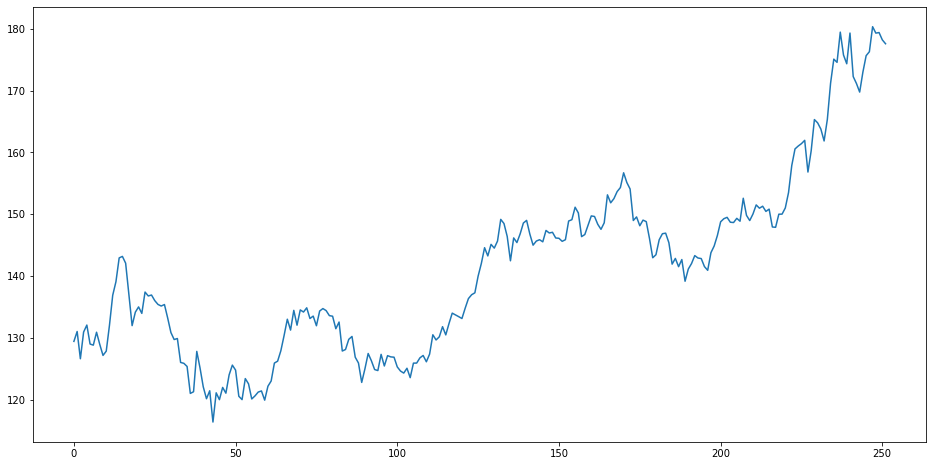

In [9]:
# applStock_df["date"]=pd.to_datetime(applStock_df.Date,format="%Y-%m-%d")
# applStock_df.index=applStock_df['date']

plt.figure(figsize=(16,8))
plt.plot(applStock_df["Close"],label='Close Price history')

In [10]:
# Data Preparation
data=applStock_df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(applStock_df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [11]:
# Min-Max Scaler
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

train_data=final_dataset[0:200,:]
valid_data=final_dataset[200:,:]

new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset.values)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [12]:
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [13]:
# Build and train the LTSM model
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

In [14]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

In [15]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

140/140 - 4s - loss: 0.0082 - 4s/epoch - 25ms/step


In [16]:
# Take a sample of a dataset to make stock price predictions using the LSTM model:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

In [17]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [18]:
# Save the LSTM model:
lstm_model.save("aapl_saved_model.h5")

In [19]:
# Visualize the predicted stock costs with actual stock costs:

In [20]:
train_data=new_dataset[:200]
valid_data=new_dataset[200:]
valid_data['Predictions']=predicted_closing_price

C:\Users\Kaalrok\anaconda3_1\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


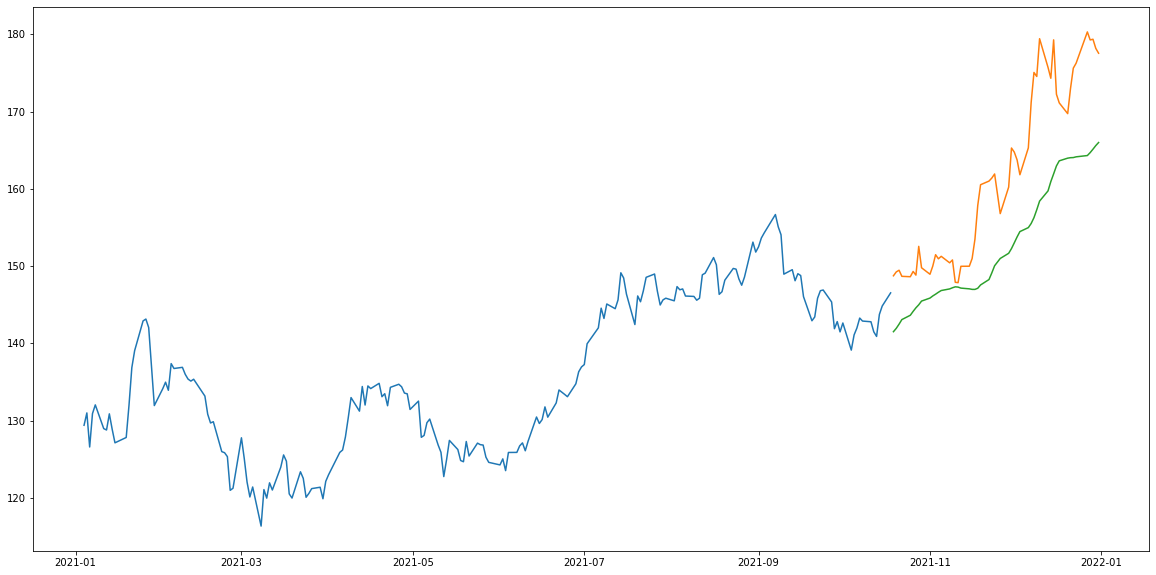

In [21]:
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])